# BoomBikes Assignment
A US bike-sharing provider BoomBikes has a daily dataset on the rental bikes based on various environmental and seasonal settings. It wishes to use this data to understand the factors affecting the demand for these shared bikes in the American market and come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown due to corona pandemic comes to an end.

Essentially, the company wants to know —

1) Which variables are significant in predicting the demand for shared bikes.
2) How well those variables describe the bike demands.

### Steps followed:

1. Read, understand and visualize data
2. Data preparation
3. Prepare and train Model
4. Residual Analysis
5. Make predictions and evaluation on test set

## Step 1: Read, understand and visualize data

In [1]:
# Importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score

In [2]:
# Supressing the Warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Read data from csv file and load to dataframe 'df1'  
df1 = pd.read_csv('day.csv')

# Display the head rows
df1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
# Display shape of dataframe
df1.shape

(730, 16)

In [5]:
# Display statistical summary of num columns
df1.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [6]:
# Check the brief summary of the dataframe
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


<span style='background:lightgreen'> Dataframe contains 730 rows, 16 columns with no null values.</span>

In [7]:
# Confirmation of no missing values
df1.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
# Rename few fields for better understanding

df1.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [9]:
# Check the header records of the dataset to observe the change

df1.head()

,instant,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [10]:
# drop duplicates if any

df1.drop_duplicates(inplace=True)

In [11]:
# check shape after drop_duplicates operation
df1.shape

(730, 16)

<span style='background:lightgreen'>Since the shape is same after dropping duplicates, it means there are no duplicates in the dataframe.</span>

In [12]:
# Drop the unwanted fields
# Since cnt = casual + registered, hence dropping these 2 columns
# instant contains only row index, dteday holds date value that can be compensated by year & month column.

df1 = df1.drop(['casual','registered','instant','dteday'], axis=1)

In [13]:
# Check top 5 rows for verification
df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [14]:
# Encoding/mapping the season, month, weekend, weathersit column

df1["season"] = df1["season"].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
df1["month"] = df1["month"].map({1:'jan',2:'feb',3:'mar',4:'apr',5:'may',6:'june',
                         7:'july',8:'aug',9:'sep',10:'oct',11:'nov',12:'dec'})
df1["weekday"] = df1["weekday"].map({0:'sun',1:'mon',2:'tue',3:'wed',4:'thu',5:'fri',6:'sat'})
df1["weathersit"] = df1["weathersit"].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [15]:
# Verify the changes
mapped_list = ["season","month","weekday","weathersit"]
for i in mapped_list:
    print(df1[i].value_counts())
    print('-'*40)

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64
----------------------------------------
jan     62
mar     62
may     62
july    62
aug     62
oct     62
dec     62
apr     60
june    60
sep     60
nov     60
feb     56
Name: month, dtype: int64
----------------------------------------
sat    105
sun    105
mon    105
tue    104
thu    104
fri    104
wed    103
Name: weekday, dtype: int64
----------------------------------------
Clear             463
Misty             246
Light_snowrain     21
Name: weathersit, dtype: int64
----------------------------------------


In [16]:
# Display head for verifying the changes

df1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [17]:
# check the column information of the dataset
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


### Visualising the Data

#### Visualising Categorical columns

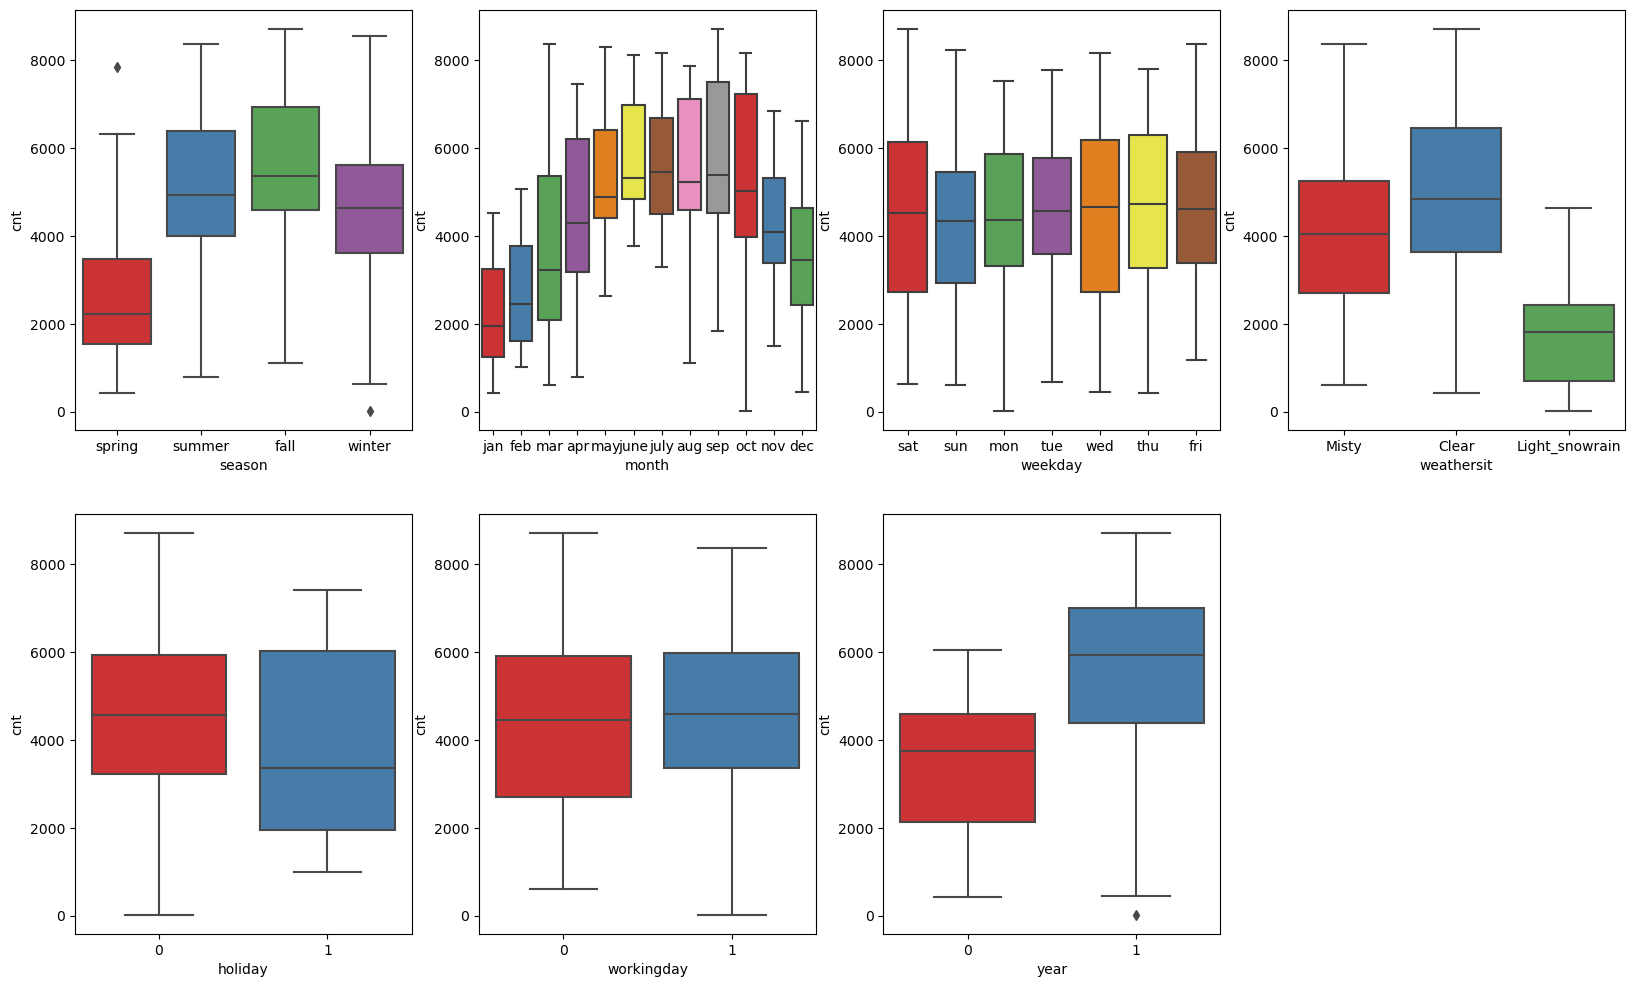

In [18]:
# Visualzing the categorical predictor variables and the target variable

plt.figure(figsize=(20, 12))
plt.subplot(2,4,1)
sns.boxplot(x = 'season', y = 'cnt', data = df1,palette="Set1")
plt.subplot(2,4,2)
sns.boxplot(x = 'month', y = 'cnt', data = df1,palette="Set1")
plt.subplot(2,4,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = df1,palette="Set1")
plt.subplot(2,4,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = df1,palette="Set1")
plt.subplot(2,4,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = df1,palette="Set1")
plt.subplot(2,4,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = df1,palette="Set1")
plt.subplot(2,4,7)
sns.boxplot(x = 'year', y = 'cnt', data = df1,palette="Set1")
plt.show()

In [19]:
# function for barplot related to categorical columns

def plot_catl_cols(column):
    plt.figure(figsize = (12,6))
    plt.subplot(1,2,1)
    sns.barplot(x=column,y='cnt',data=df1,palette="Set1")
    
    plt.subplot(1,2,2)
    sns.barplot(x=column,y='cnt',data=df1, hue='year',hue_order=[0,1],palette='Set1')
    L=plt.legend()
    L.get_texts()[0].set_text('2018')
    L.get_texts()[1].set_text('2019')
    plt.show()

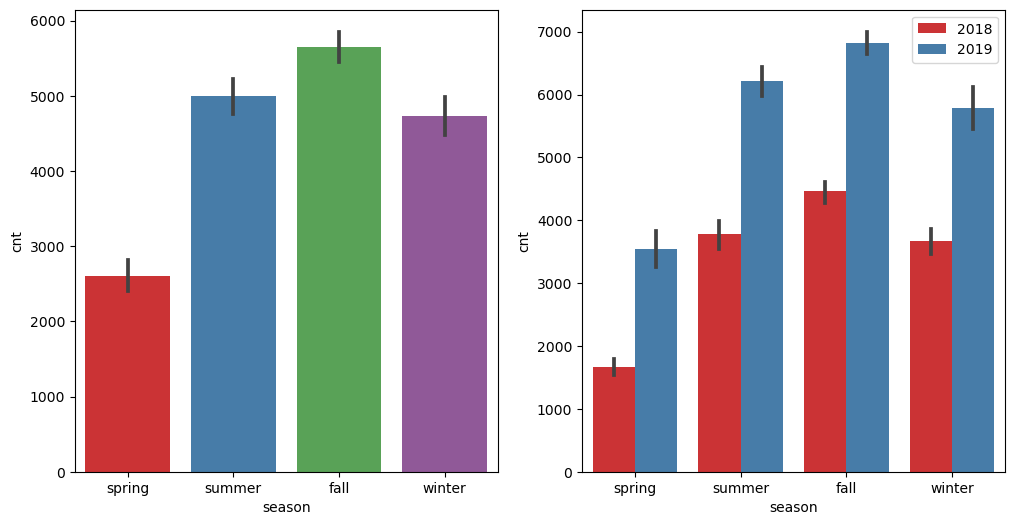

In [20]:
# Visualize season column

plot_catl_cols('season')

<span style='background:lightgreen'>Booking count has significantly increased for each season in 2019 compared to 2018 and Fall season seems to have attracted more booking in both the years</span>

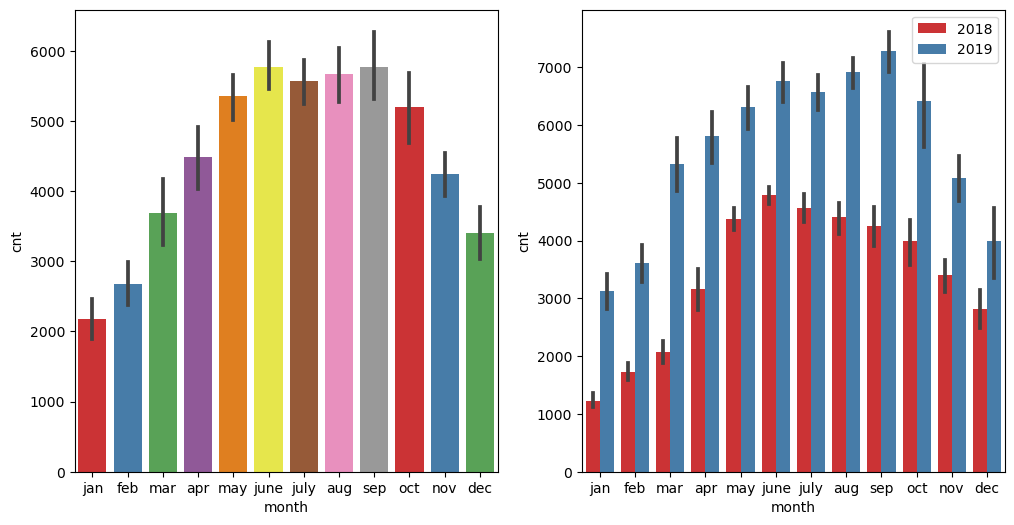

In [21]:
# Visualize month column

plot_catl_cols('month')

<span style='background:lightgreen'>There is a good increase in bookings  during the months of may, june, july, aug, sep and oct compared other months of the year. We can see a trend in increasting starting of the year till mid of the year and then it started decreasing as we approached the end of year.</br>
Number of booking for each month have increased in 2019 as compared to 2018</span>

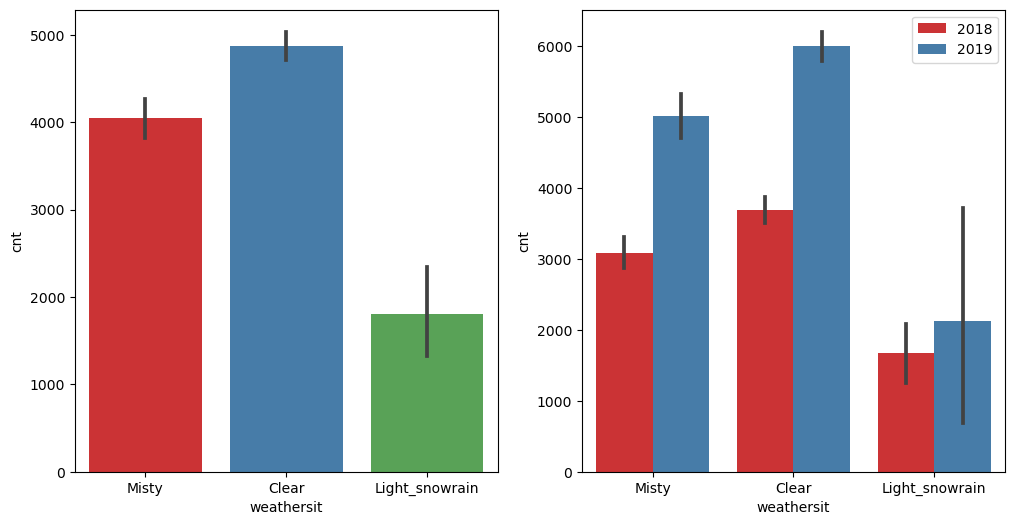

In [22]:
# plotting visualization for weathersit column

plot_catl_cols('weathersit')

<span style='background:lightgreen'>Clear weather has more booking and is obvious. Comparing 2018 and 2019, booking has been increased for each weather conditions in 2019</span>

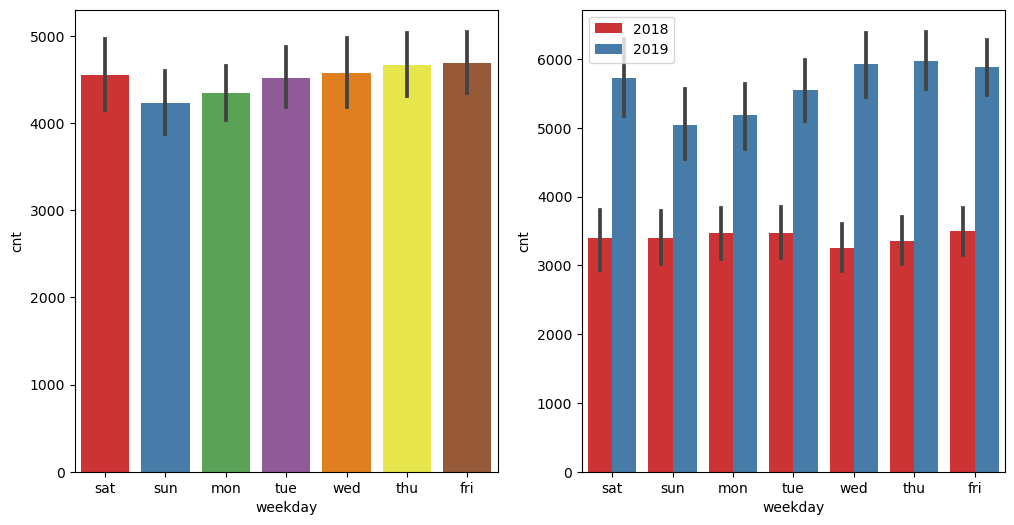

In [23]:
# plotting visualization for weekday column

plot_catl_cols('weekday')

<span style='background:lightgreen'>Thursday, Friday, Saturday and Sunday have more number of bookings as compared to the start of the week for both 2018 and 2019</span>


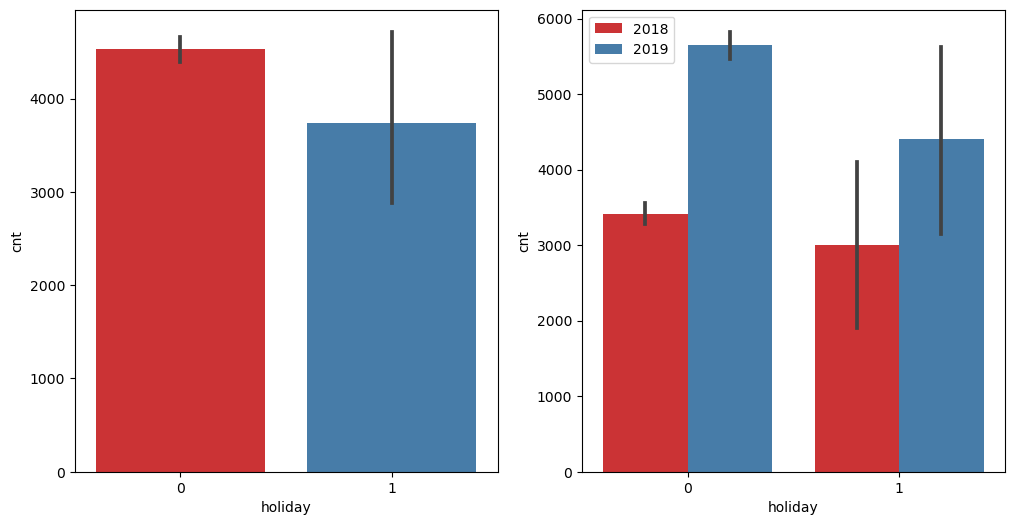

In [24]:
# plotting visualization for holiday column

plot_catl_cols('holiday')

<span style='background:lightgreen'>holidays show less number of bookings and quite obvious that people would want to stay at home and spent time with well beings</span>

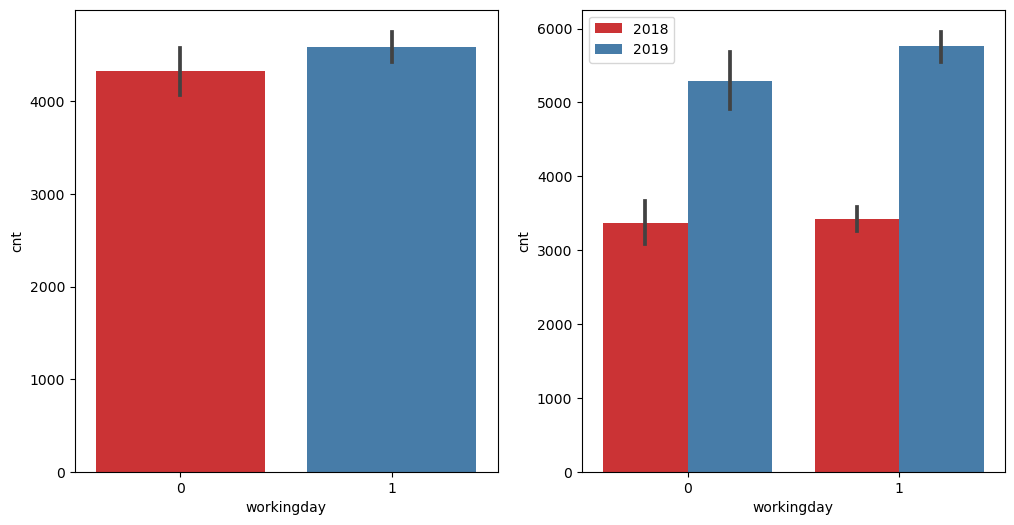

In [25]:
# plotting visualization for workingday column

plot_catl_cols('workingday')

<span style='background:lightgreen'>Not much difference between a working and non working day for both 2018 and 2019</span>

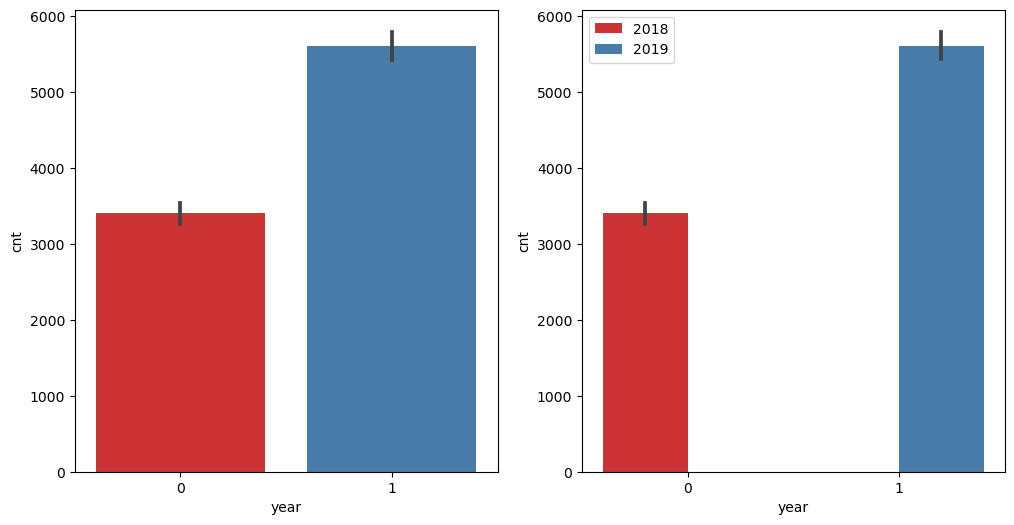

In [26]:
# plotting visualization for year column

plot_catl_cols('year')

<span style='background:lightgreen'>Certainly 2019 got more number of booking  compared 2018 from the beginning of the plots we have seen</span>

#### Visualising Numerical columns

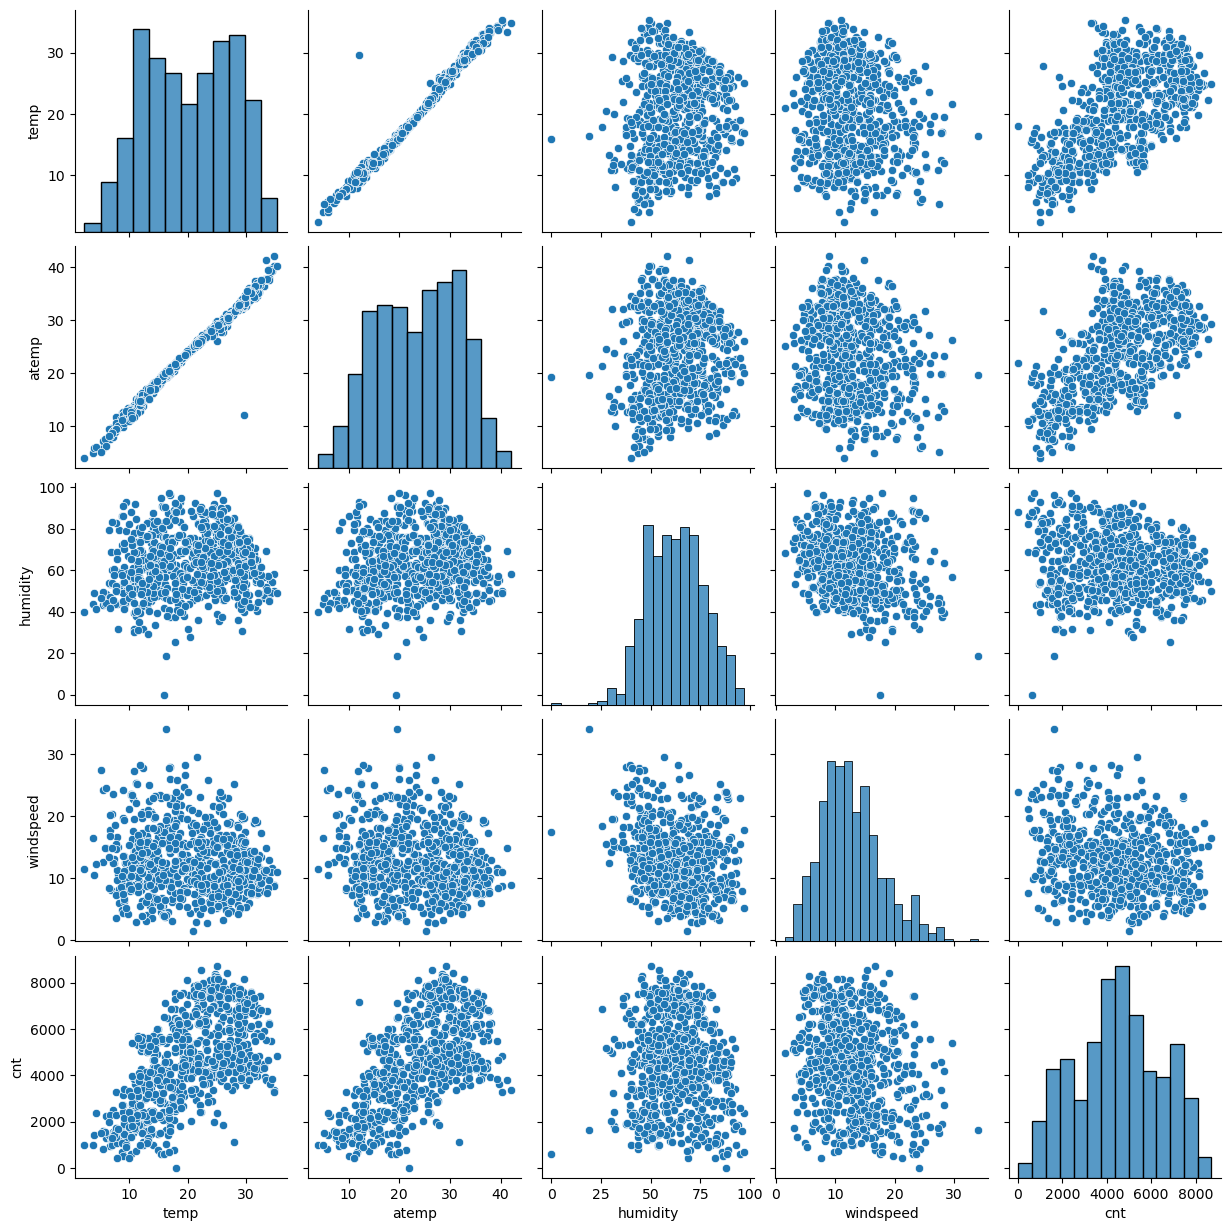

In [27]:
# Visualizing the numerical columns

sns.pairplot(data=df1,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

__Observations from pair plot__</br>

 <span style='background:lightgreen'>High correlation between temp and a temp could lead to multicollinearity issue </br>
  We can see a positive correlation exists between temp n cnt and atemp n cnt.These correlation helps to motivate for considering Linear regression model of our data</span>

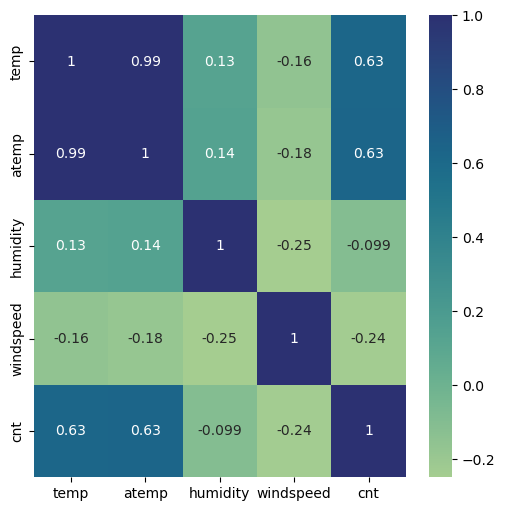

In [28]:
# Let's plot a heat map for these variables

plt.figure(figsize = (6,6))
sns.heatmap(df1[['temp','atemp','humidity','windspeed','cnt']].corr(), annot=True, cmap='crest')
plt.show()

__Observations from above heatmap:__ </br>
<span style='background:lightgreen'>temp and atemp are both 63% correlated with cnt(target variable) </br>
  since temp and atemp are 99% correlated with each otherwe cant consider both for building model due to multicolinearity problems. We will The factors to keep which variable will be suitable to consider will be based on VIF and p-value.</span>

## Step 2: Data Preparation

### Dummy Variable Creation

In [29]:
# Create dummy variables for month, weekday, weathersit and season variables

months_df = pd.get_dummies(df1.month,drop_first=True,dtype=int)
weekdays_df = pd.get_dummies(df1.weekday,drop_first=True,dtype=int)
weathersit_df = pd.get_dummies(df1.weathersit,drop_first=True,dtype=int)
seasons_df = pd.get_dummies(df1.season,drop_first=True,dtype=int)

In [30]:
months_df.head()

,aug,dec,feb,jan,july,june,mar,may,nov,oct,sep
0,0,0,0,1,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,0


In [31]:
weekdays_df.head()

,mon,sat,sun,thu,tue,wed
0,0,1,0,0,0,0
1,0,0,1,0,0,0
2,1,0,0,0,0,0
3,0,0,0,0,1,0
4,0,0,0,0,0,1


In [32]:
weathersit_df.head()

,Light_snowrain,Misty
0,0,1
1,0,1
2,0,0
3,0,0
4,0,0


In [33]:
seasons_df.head()

,spring,summer,winter
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [34]:
# Concat dummy with the original dataframe

df1_new = pd.concat([df1,months_df,weekdays_df,weathersit_df,seasons_df],axis=1)
df1_new.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,spring,0,jan,0,sat,0,Misty,14.110847,18.18125,80.5833,...,1,0,0,0,0,0,1,1,0,0
1,spring,0,jan,0,sun,0,Misty,14.902598,17.68695,69.6087,...,0,1,0,0,0,0,1,1,0,0
2,spring,0,jan,0,mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,jan,0,tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,1,0,0,0,1,0,0
4,spring,0,jan,0,wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,1,0,0,1,0,0


In [35]:
# dropping unnecessary columns as created dummy variables out of them.

df1_new.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [36]:
# check the head of new dataframe

df1_new.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,...,1,0,0,0,0,0,1,1,0,0
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,1,0,0,0,0,1,1,0,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,1,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,1,0,0,1,0,0


In [37]:
# check the shape of new dataframe

df1_new.shape

(730, 30)

In [38]:
# check the column info of new dataframe 

df1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   aug             730 non-null    int32  
 9   dec             730 non-null    int32  
 10  feb             730 non-null    int32  
 11  jan             730 non-null    int32  
 12  july            730 non-null    int32  
 13  june            730 non-null    int32  
 14  mar             730 non-null    int32  
 15  may             730 non-null    int32  
 16  nov             730 non-null    int32  
 17  oct             730 non-null    int

### Train-Test Split

In [39]:
# creating training set and test set

df1_train, df1_test = train_test_split(df1_new, train_size=0.70, random_state=100)
print(df1_train.shape)
print(df1_test.shape)

(510, 30)
(220, 30)


### Rescaling

In [40]:
scaler = MinMaxScaler()

num_vars = ['temp','atemp','humidity','windspeed','cnt']

df1_train[num_vars] = scaler.fit_transform(df1_train[num_vars])

In [41]:
df1_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,1,0,0,0,0,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,1,0,0,0,0,0,1,1,0,0
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,0,0,1,0,1,0
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,0,0,0,0,0,0,1,0,1,0


In [42]:
# Descriving the variables
df1_train[num_vars].describe()

,temp,atemp,humidity,windspeed,cnt
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


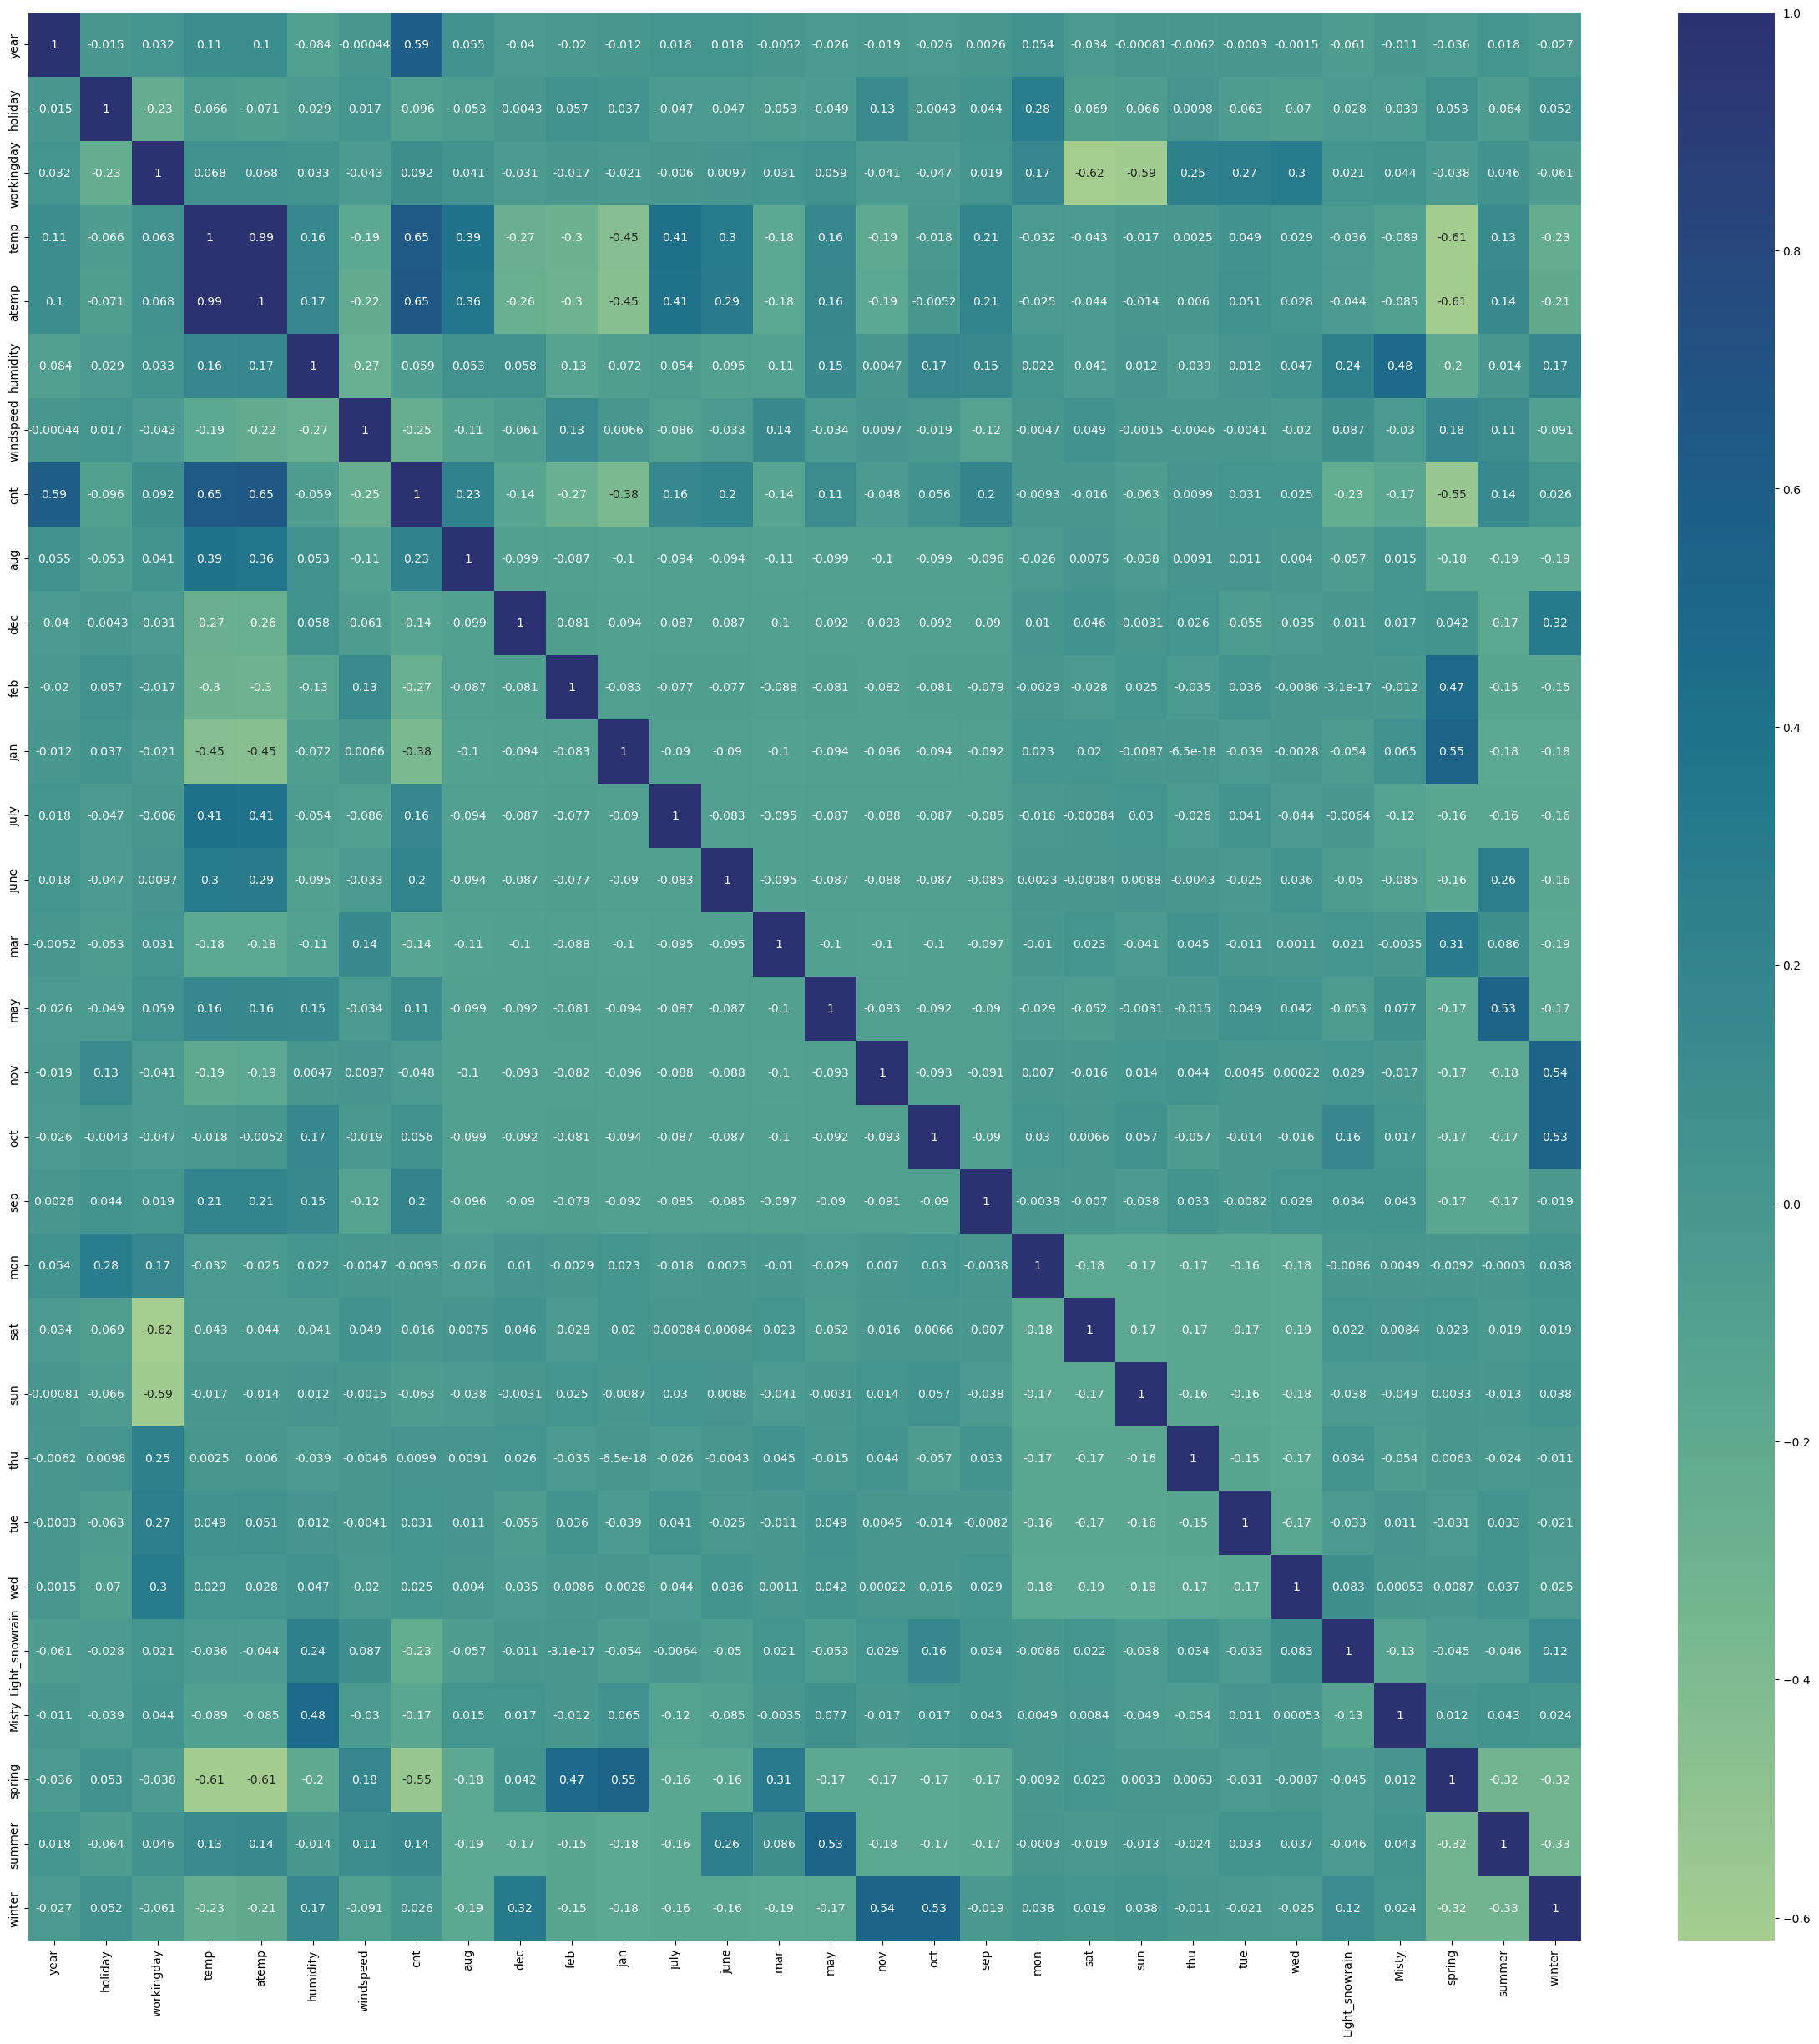

In [43]:
plt.figure(figsize=(30,30))
sns.heatmap(df1_train.corr(), annot=True, cmap='crest')
plt.show()

__Observations:__</br>

<span style='background:lightgreen'>'cnt' seems to have good correlation with 'year', 'temp' & 'atemp'. </br>
 'Misty' and 'humidity' show correlation. </br>
    'summer' season with 'may' month.</br>
    'spring' season with 'jan' & 'feb' month. </br>
    'winter' season with 'oct' & 'nov' month show good correlation.</span>

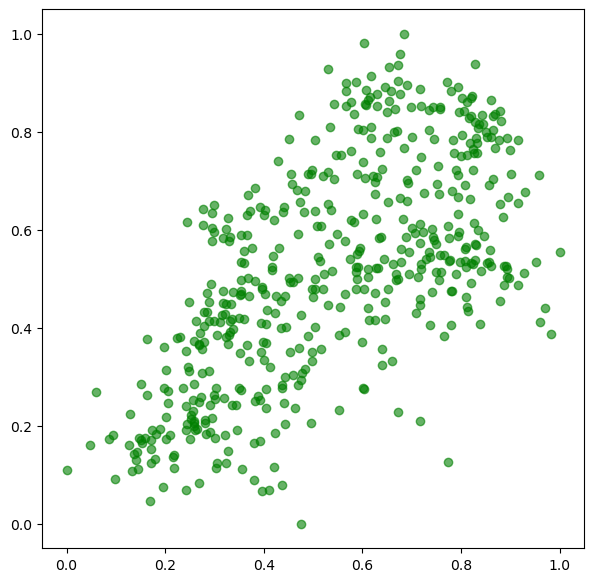

In [44]:
# Visualizing  temp vs cnt corrleation trends via Scatter plot.

plt.figure(figsize=[7,7])
plt.scatter(df1_train.temp, df1_train.cnt,color = 'green',alpha=0.6 )
plt.show()

<span style='background:lightgreen'> this confirms positive correlation exists between temp n cnt</span>

__Visulization Inference__

<span style='background:lightgreen'>After a good number visualization  plots, we witness that, variables are linearly correlated with the target variable. This helps us consider  __Linear Regression__ for building our model </span>

## Step 3: Building the Model

<span style='background:lightgreen'>For building the model, we will take automated plus manual approach </br>
 RFE would help us in arriving top 15 features and post observing p values & VIF, we will keep omitting one variable at a time till we arrive at a considerable good model</span>

In [45]:
# Creating X_train, y_train
y_train = df1_train.pop('cnt') #pop out target variable
X_train = df1_train

In [46]:
# Recursive Feature Elimination(RFE) process
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15, step=1)
rfe = rfe.fit(X_train, y_train)

In [47]:
# List of features with ranking

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('aug', False, 7),
 ('dec', False, 3),
 ('feb', False, 4),
 ('jan', True, 1),
 ('july', True, 1),
 ('june', False, 14),
 ('mar', False, 15),
 ('may', False, 6),
 ('nov', False, 2),
 ('oct', False, 13),
 ('sep', True, 1),
 ('mon', False, 9),
 ('sat', True, 1),
 ('sun', False, 8),
 ('thu', False, 11),
 ('tue', False, 10),
 ('wed', False, 12),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1)]

In [48]:
# Features selected by RFE

col = X_train.columns[rfe.support_]
print(col)

Index(['year', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'jan',
       'july', 'sep', 'sat', 'Light_snowrain', 'Misty', 'spring', 'summer',
       'winter'],
      dtype='object')


In [49]:
# Features rejected by RFE

X_train.columns[~rfe.support_]

Index(['atemp', 'aug', 'dec', 'feb', 'june', 'mar', 'may', 'nov', 'oct', 'mon',
       'sun', 'thu', 'tue', 'wed'],
      dtype='object')

In [50]:
# A function to calculate VIF of variables

def calculateVIF(df1):
    vif = pd.DataFrame()
    vif['Features'] = df1.columns
    vif['VIF'] = [variance_inflation_factor(df1.values, i) for i in range(df1.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [51]:
# dataframe with RFE selected variables

X_train_rfe = X_train[col]

### 1st Model (Taking all the 15 Features)

In [52]:
# Building first linear regression model

# add intercept to X train
X_train_sm = sm.add_constant(X_train_rfe)

# create the linear regression model
lr_model = sm.OLS(y_train,X_train_sm).fit()

# model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Mon, 22 Jul 2024   Prob (F-statistic):          4.22e-191
Time:                        12:16:17   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2519      0.036      6.

In [53]:
# calculate VIF Now

calculateVIF(X_train_rfe)

,Features,VIF
4,humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
12,spring,4.53
14,winter,3.46
13,summer,2.85
11,Misty,2.29
0,year,2.09
9,sat,1.98


#### In Order to omit variables, we have 4 below scenarios p-values & VIF information
<span style='background:lightgreen'> High p-value, high VIF - First in the list to be removed (In this case the variable is less significant and highly collinear with others)</br>
High p-value, low VIF - 2nd in the list to be removed  </br>
Low p-value, High VIF - 3rd in the list to be removed</br>
Low p-value, low VIF - Keep them as it is (high significance + less collinear)
</span>

In [54]:
# R-squared of this model is pretty good (84.8%) 
# The p-values of all the coefficients are below 5% , so coefficients are statistically significant.
# From the VIF list, VIF of humidity is very high, implies it is highly collinear with other variables, hence 1st candidate to get dropped
# This elimination of feature is in allignment with the 3rd scenario (low p, high VIF)

X_train_rfe = X_train_rfe.drop('humidity', axis=1)

### 2nd Model (With all Features without 'humidity')

In [55]:
# Lets  build 2nd linear regression model

# add intercept
X_train_sm = sm.add_constant(X_train_rfe)

# create the model
lr_model = sm.OLS(y_train,X_train_sm).fit()

# model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Mon, 22 Jul 2024   Prob (F-statistic):          1.60e-188
Time:                        12:16:25   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1737      0.031      5.

In [56]:
# calculate VIF

calculateVIF(X_train_rfe)

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
11,spring,3.07
12,summer,2.34
0,year,2.08
13,winter,1.98
8,sat,1.97
5,jan,1.62
6,july,1.59


In [57]:
# We see eventhough after dropping 'humidity', R-squared value of 2nd model has not dopped much compared to 1st model (~84%)
# Again The p-values of all the coefficients are below 5% and are statistically significant.
# but VIF of 'temp' is still decently high,so it has high collinearity with other variables, 2nd canidate to get dropped
# This elimination of feature is in allignment with the 3rd scenario (low p, high VIF)

X_train_rfe = X_train_rfe.drop('temp', axis=1)

### 3rd Model (With all the Features except 'humidity' & 'temp')

In [58]:
# Building 3rd linear regression model

# add intercept
X_train_sm = sm.add_constant(X_train_rfe)

# create the model
lr_model = sm.OLS(y_train,X_train_sm).fit()

# model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     135.7
Date:                Mon, 22 Jul 2024   Prob (F-statistic):          6.44e-154
Time:                        12:16:33   Log-Likelihood:                 425.63
No. Observations:                 510   AIC:                            -823.3
Df Residuals:                     496   BIC:                            -764.0
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5444      0.020     27.

In [59]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,windspeed,4.27
2,workingday,3.83
10,spring,2.97
11,summer,2.29
12,winter,1.98
0,year,1.91
7,sat,1.69
4,jan,1.60
9,Misty,1.57
5,july,1.30


In [60]:
# After dropping 'temp',  the R-squared has dropped to 78% and still looks to be a decent model
# But the p-value of 'july' increased to 65%, which is very high. 3rd candidate to get dropped
# And the p-value of 'holiday' is decently high (8%). This can be dealt later
# And the VIF values of all the variables are below 5  
# This elimination of feature is in allignment with the 2nd scenario (high p, low VIF)

X_train_rfe = X_train_rfe.drop('july', axis=1)

### 4th Model (With all the Features wihtout 'humidity' , 'temp' & 'july')

In [61]:
# Building 4th linear regression model

# add intercept
X_train_sm = sm.add_constant(X_train_rfe)

# create the model
lr_model = sm.OLS(y_train,X_train_sm).fit()

# model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.775
Method:                 Least Squares   F-statistic:                     147.2
Date:                Mon, 22 Jul 2024   Prob (F-statistic):          5.73e-155
Time:                        12:16:41   Log-Likelihood:                 425.53
No. Observations:                 510   AIC:                            -825.1
Df Residuals:                     497   BIC:                            -770.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5406      0.018     29.

In [62]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
3,windspeed,4.12
2,workingday,3.54
9,spring,2.68
10,summer,2.01
0,year,1.89
11,winter,1.78
6,sat,1.62
4,jan,1.60
8,Misty,1.57
5,sep,1.20


In [63]:
# After dropping 'july',the 4th model R-squared value is around (78%).
# But the p-value of 'holiday' is still 8%, which is slightly high and needs to be dropped)
# This elimination of feature is in allignment with the 2nd scenario (high p, low VIF)

X_train_rfe = X_train_rfe.drop('holiday', axis=1)

### 5th Model (With all the Features without 'humidity' , 'temp', 'july' & 'holiday')

In [64]:
# Building 5th linear regression model

# add intercept
X_train_sm = sm.add_constant(X_train_rfe)

# create the model
lr_model = sm.OLS(y_train,X_train_sm).fit()

# model summary
print(lr_model.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.779
Model:                            OLS   Adj. R-squared:                  0.774
Method:                 Least Squares   F-statistic:                     159.7
Date:                Mon, 22 Jul 2024   Prob (F-statistic):          2.01e-155
Time:                        12:16:48   Log-Likelihood:                 423.97
No. Observations:                 510   AIC:                            -823.9
Df Residuals:                     498   BIC:                            -773.1
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.5332      0.018     30.

In [65]:
# calculate VIF
calculateVIF(X_train_rfe)

,Features,VIF
2,windspeed,4.04
1,workingday,3.29
8,spring,2.65
9,summer,2.00
0,year,1.88
10,winter,1.73
3,jan,1.60
7,Misty,1.57
5,sat,1.56
4,sep,1.18


__Observations from 5th model__:
<span style='background:lightgreen'>
After dropping 'holiday', the R-squared value in the 5th model is almost the same i.e. 78%.
p-values of all the coefficients are below 5% which shows all the coefficients are statistically significant.
The VIF values of all the variables are below 5, which shows we don't have much multicollinearity issue now in this model.
The Probability(F-statistic) is pretty low which shows the model fit is not by chance.
We can say that this is the final model that we have converged upon. </span>

In [66]:
# Checking the parameters and their coefficient values
lr_model.params

const             0.533171
year              0.248004
workingday        0.056374
windspeed        -0.188695
jan              -0.103255
sep               0.071471
sat               0.064819
Light_snowrain   -0.302344
Misty            -0.087382
spring           -0.258093
summer           -0.039401
winter           -0.074260
dtype: float64

## Step 4: Residual Analysis

In [67]:
# Predictions on Training set
y_train_pred = lr_model.predict(X_train_sm)
y_train_pred.head()

576    0.787605
426    0.452336
728    0.397957
482    0.683646
111    0.390873
dtype: float64

In [68]:
# Error = y_train - y_train_pred

res =  y_train - y_train_pred
res.head()

576    0.040053
426    0.012919
728   -0.193861
482   -0.200674
111   -0.199778
dtype: float64

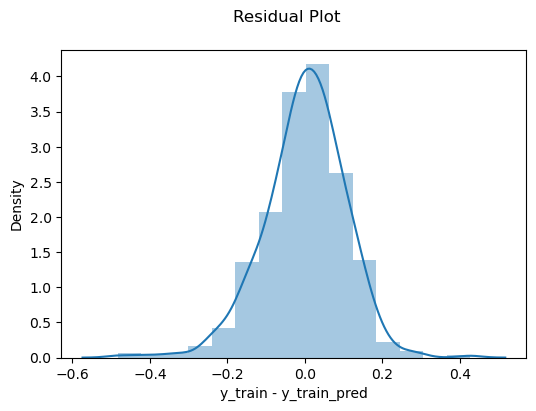

In [69]:
# Residual plot
plt.figure(figsize=(6,4))
sns.distplot(res, bins=15)
plt.suptitle('Residual Plot')
plt.xlabel('y_train - y_train_pred')
plt.show()

#### The residual plot is following  Normal distribution centered around zero

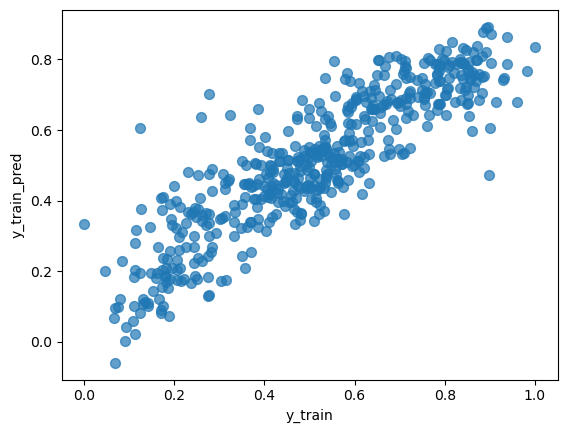

In [70]:
# Actual vs Predicted
plt.scatter(y_train, y_train_pred, alpha=0.7, s=50)
plt.xlabel('y_train')
plt.ylabel('y_train_pred')
plt.show()

#### Linearity Check

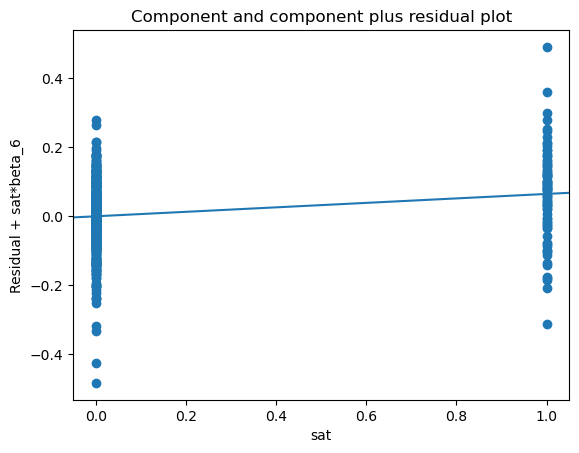

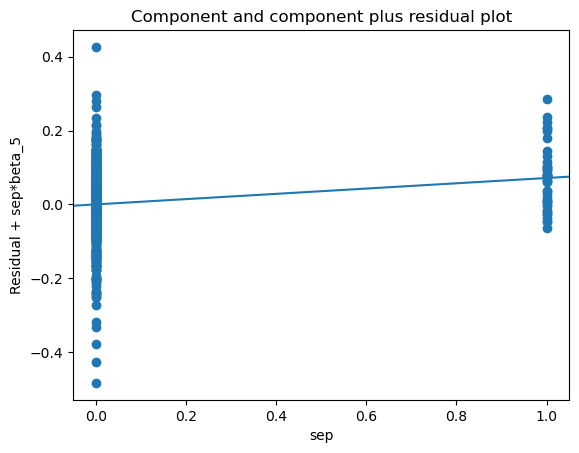

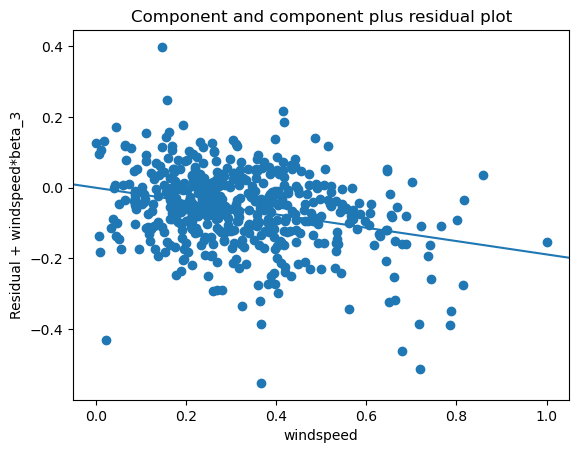

In [71]:
sm.graphics.plot_ccpr(lr_model, 'sat')
plt.show()

sm.graphics.plot_ccpr(lr_model, 'sep')
plt.show()

sm.graphics.plot_ccpr(lr_model, 'windspeed')
plt.show()

__Linearity can be observed from above visualizations.__

#### Homoscedasticity

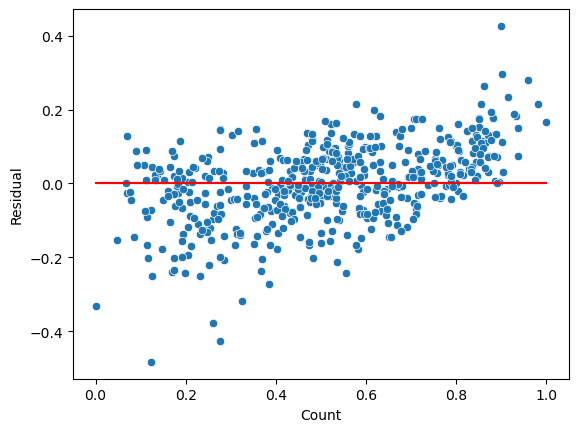

In [72]:
y_train_pred = lr_model.predict(X_train_sm)
residual = y_train - y_train_pred
sns.scatterplot(x=y_train,y=residual)
plt.plot(y_train,(y_train - y_train), '-r')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

__No visible patterns observed from above plot for residuals.__

## Step 5: Making predictions and test set evaluation

In [73]:
df1_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,29.793347,33.27085,63.7917,5.459106,6043,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,32.082500,36.04875,59.2083,7.625404,6211,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,19.270000,22.85230,81.2917,13.250121,2659,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,31.433347,34.24915,42.4167,13.417286,4780,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,29.315000,32.19710,30.5000,19.583229,4968,0,0,...,0,0,1,0,0,0,0,0,1,0


In [74]:
# Rescaling the test set using a scaler that is fit on training set
num_vars = ['temp','atemp','humidity','windspeed','cnt']

df1_test[num_vars] = scaler.transform(df1_test[num_vars])

In [75]:
# checking the head of df_test
df1_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,aug,dec,...,sat,sun,thu,tue,wed,Light_snowrain,Misty,spring,summer,winter
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,1,0,0,0
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,0,0,0,0,1,0,0,0,1,0
299,0,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,0,1,0,0,0,1,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,1,0,0,0,0,0
152,0,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,0,0,1,0,0,0,0,0,1,0


In [76]:
y_test = df1_test.pop('cnt')
X_test = df1_test

In [77]:
# Selecting the same features on test set comapred to the model
X_test = X_test[X_train_rfe.columns]

In [78]:
# add constant
X_test_sm = sm.add_constant(X_test)

# make predictions
y_test_pred = lr_model.predict(X_test_sm)

In [79]:
y_test_pred.head()

184    0.429897
535    0.769141
299    0.364840
221    0.525471
152    0.448738
dtype: float64

### Model evaluation

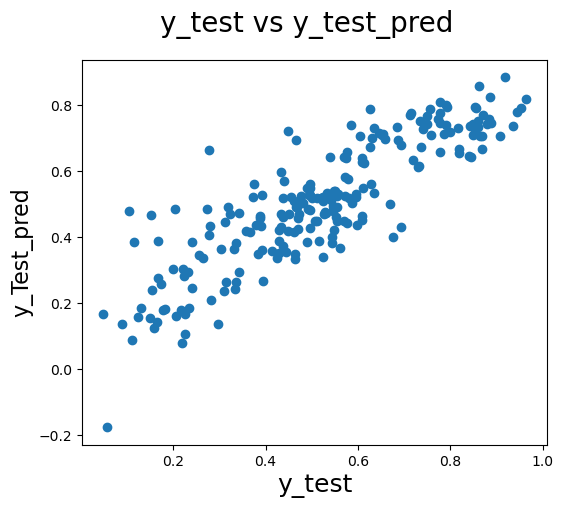

In [80]:
# Plotting y_test and y_pred for spread understanding

fig = plt.figure(figsize=(6,5))
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_Test_pred', fontsize = 16) 
plt.show()

In [81]:
# R-Squared value on the test set
r2_test = r2_score(y_true= y_test, y_pred=y_test_pred)
round(r2_test,4)

0.7417

In [82]:
round(lr_model.params,4)

const             0.5332
year              0.2480
workingday        0.0564
windspeed        -0.1887
jan              -0.1033
sep               0.0715
sat               0.0648
Light_snowrain   -0.3023
Misty            -0.0874
spring           -0.2581
summer           -0.0394
winter           -0.0743
dtype: float64

The equation of best fitted line is:

$ cnt = 0.5332 + 0.2480  \times  year + 0.0564  \times  workingday - 0.1887 \times windspeed - 0.1033 \times jan + 0.0715 \times sep + 0.0648 \times sat - 0.3023 \times Lightsnowrain - 0.0874 \times Misty - 0.2581 \times spring - 0.0394 \times summer - 0.0743 \times winter $

In [83]:
# Calculating Adjusted-R^2 value for the test dataset
n = X_test.shape[0] # No of rows
p = X_test.shape[1] # No of predictor variables

adjusted_r2_test = round(1-((1-r2_test)*(n-1)/(n-p-1)),4)
print(adjusted_r2_test)

0.7281


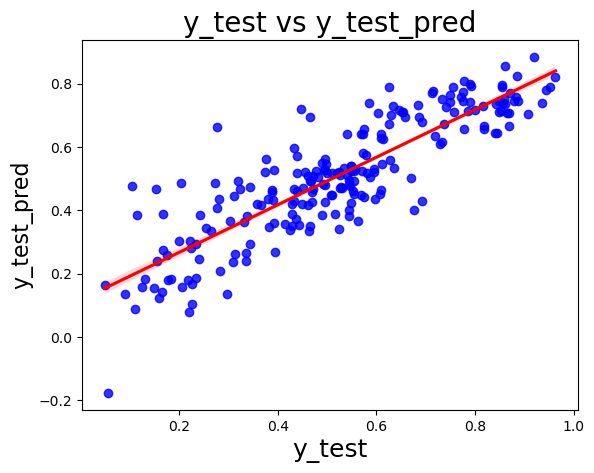

In [84]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x= y_test, y= y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_test_pred', fontsize=16)
plt.show()

### Comparision between Training and Testing dataset:
    - Train dataset R^2          : 0.779
    - Test dataset R^2           : 0.742
    - Train dataset Adjusted R^2 : 0.774    
    - Test dataset Adjusted R^2  : 0.728

#### The Demand of bikes depend on 'year', 'workingday', 'windspeed', 'jan','Misty', 'spring', 'summer','sep', 'sat', 'Light_snowrain', and 'winter'.

__The R-squared & Adjusted R-squared of training set and test set are comparable (within 5% range) which shows that the final model is a stable model and it also shows that whatever the model has learned on the training set, it is able to generalise well on the test set.__